# Task 2: Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Customer Profile model

In [2]:
customer_profile = pd.read_csv('../dataset/customer_profile_model.csv', sep='\t', index_col=0)
customer_profile

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  
CustomerID                      
12347.0     5.017280  8.188192  
12348.0     2.397895  6.664970  
12349.0     4.276666  7.284512  
12350.0     2.772589  5.684939  
12352.0     4.248495  7.143151  
...              ...       ...  
18280.0     2.302585  5.196285  
18281.0     1.945910  4.392224  
18282.0     2.484907  5.173887  
18283.0     6.577861  7.620499  
18287.0     4.248495  7.516041  

[4206 rows x 8 columns]

## Standardization \& Dimensionality Reduction

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

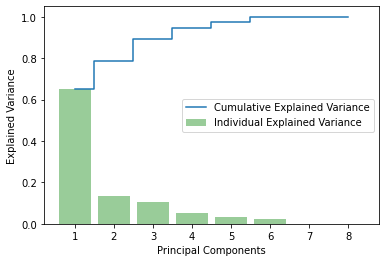

In [4]:
scaler = StandardScaler()
std_customer_profile = scaler.fit_transform(customer_profile)

pca = PCA()
pca.fit(std_customer_profile)

plt.step(range(1, customer_profile.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, customer_profile.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');

The graph shows the amount of variance captured depending on the number of components we include. A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 2 components.

In [5]:
pca = PCA(n_components=2)
pca_customer_profile = pca.fit_transform(std_customer_profile)

## K-Means

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
elbow = []
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    clusters = kmeans.fit_predict(pca_customer_profile)
    elbow.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_customer_profile, clusters))

The elbow method only uses intra-cluster distances while the silhouette method uses a combination of inter- and intra-cluster distances. So, we can expect that they end up with different results.

### Silhouette method

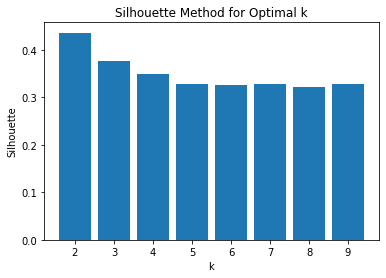

In [8]:
plt.bar(range(2, 10), silhouette)
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');

In [9]:
print('The best silhouette score is:', max(silhouette))

The best silhouette score is: 0.4360166398483022


In [10]:
kmeans = KMeans(init='k-means++', n_clusters=2)
clusters_customers = kmeans.fit_predict(pca_customer_profile)

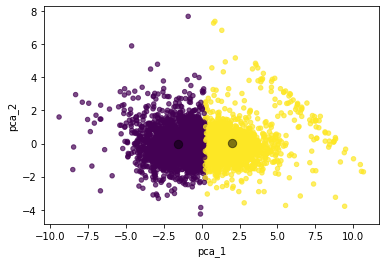

In [19]:
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7)
# select cluster centers
centroids = kmeans.cluster_centers_
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

In [20]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0     1
CustomersNb  2349  1857

For comparison, if we run the K-Means algorithm without the PCA step, the result would be the following:

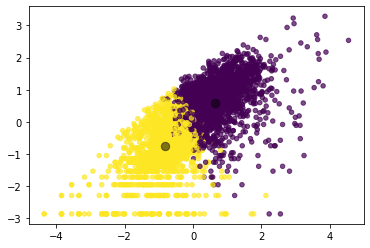

In [21]:
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7)
# select cluster centers
centroids = pca.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

### Elbow method

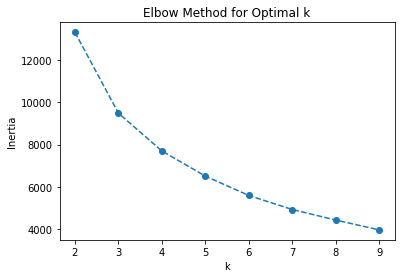

In [22]:
plt.plot(range(2, 10), elbow, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.ylabel('Inertia')
plt.xlabel('k');

In [23]:
print('The silhouette score for k = 3 is:', silhouette[1])

The silhouette score for k = 3 is: 0.3766171112279736


In [24]:
kmeans = KMeans(init='k-means++', n_clusters=3)
clusters_customers = kmeans.fit_predict(pca_customer_profile)

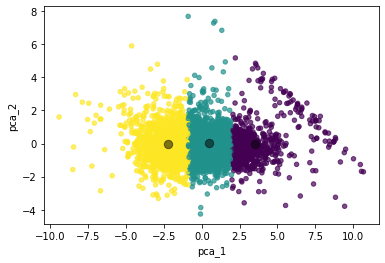

In [26]:
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
# select cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

In [27]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0     1     2
CustomersNb  711  1979  1516

For comparison, if we run the K-Means algorithm without the PCA step, the result would be the following:

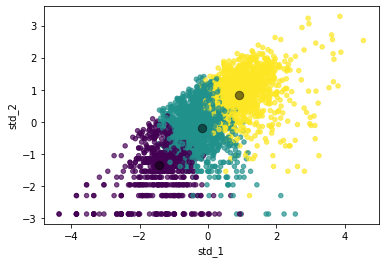

In [33]:
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7)
plt.xlabel('std_1')
plt.ylabel('std_2')
# select cluster centers
centroids = pca.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=70, alpha=0.5);

In [31]:
customer_profile_kmeans = customer_profile.copy(deep=True)
customer_profile_kmeans['cluster'] = clusters_customers
customer_profile_kmeans['cluster'] = customer_profile_kmeans['cluster'].map({0: 'low', 1: 'medium', 2: 'high'}) # check clusters-labels mapping for each run!
customer_profile_kmeans

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M cluster  
CustomerID                              
12347.0     5.017280  8.188192    high  
12348.0     2.397895  6.664970  medium  
12349.0     4.276666  7.284512    high  
12350.0     2.772589  5.684939  medium  
12352.0     4.248495  7.143151  medium  
...              ...       ...     ...  
18280.0     2.302585  5.196285     low  
18281.0     1.945910  4.392224     low  
18282.0     2.484907  5.173887     low  
18283.0     6.577861  7.620499    high  
18287.0     4.248495  7.516041    high  

[4206 rows x 9 columns]

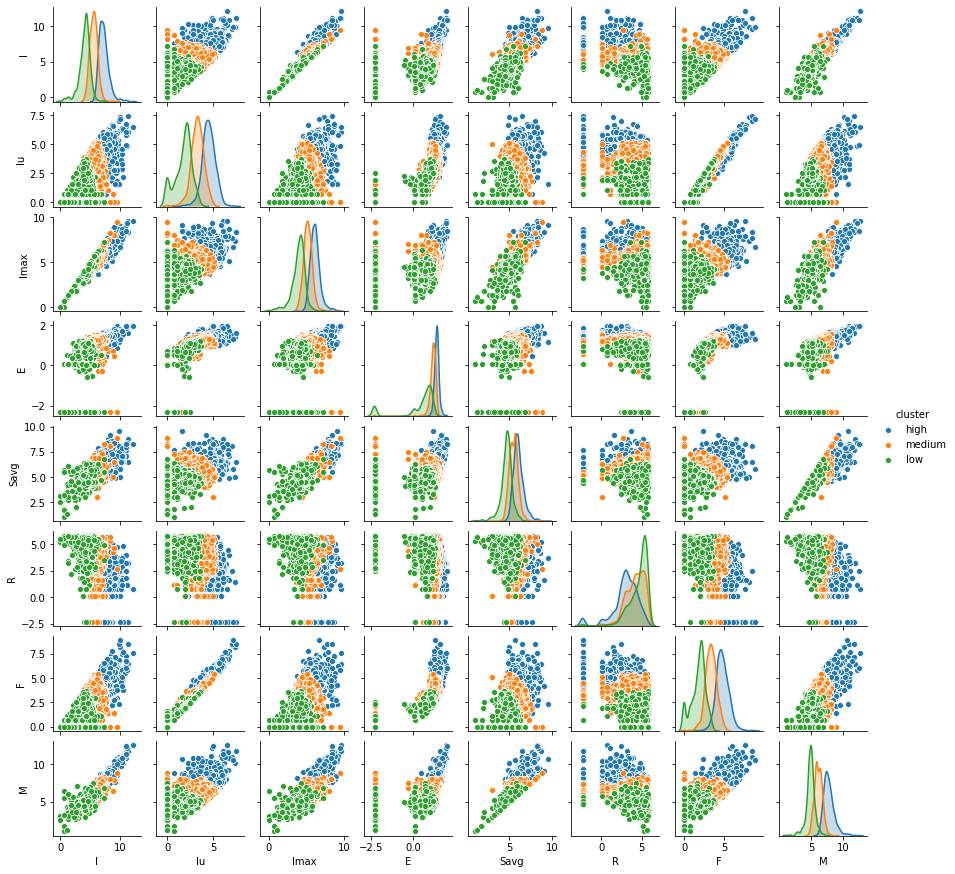

In [32]:
sns.pairplot(customer_profile_kmeans, hue='cluster', diag_kind='kde', height=1.5);

In [33]:
customer_profile_kmeans.to_csv('../dataset/customer_profile_kmeans.csv', sep='\t')

## Fuzzy C-Means

In [113]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.fcm import fcm

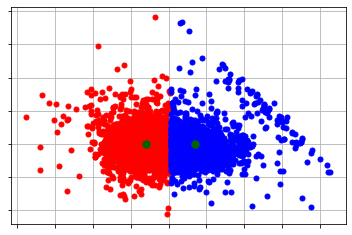

In [119]:
# initialize
initial_centers = kmeans_plusplus_initializer(pca_customer_profile, 2, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(pca_customer_profile, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

# visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, pca_customer_profile, markersize=10)
visualizer.append_cluster(centers, markersize=15)
visualizer.show();

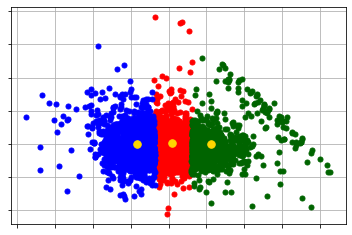

In [48]:
# initialize
initial_centers = kmeans_plusplus_initializer(pca_customer_profile, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(pca_customer_profile, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

# visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, pca_customer_profile, markersize=10)
visualizer.append_cluster(centers, markersize=15)
visualizer.show();

In [120]:
customer_profile_fuzzy_cmeans = customer_profile.copy(deep=True)
customer_profile_fuzzy_cmeans['cluster'] = clusters_customers
customer_profile_fuzzy_cmeans['cluster'] = customer_profile_fuzzy_cmeans['cluster']
customer_profile_fuzzy_cmeans

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        1  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        1  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        0  
18287.0     4.248495  7.516041        1  

[4206 rows x 9 columns]

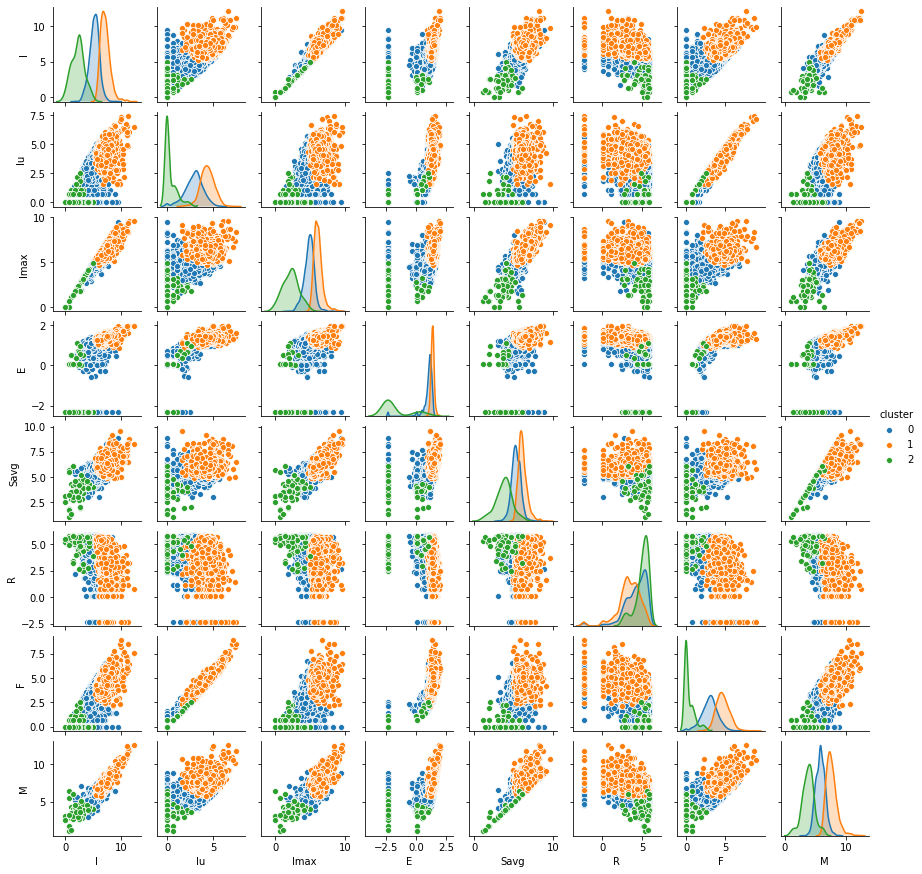

In [121]:
sns.pairplot(customer_profile_fuzzy_cmeans, hue='cluster', diag_kind='kde', height=1.5);

## DBSCAN

We must provide a value for *eps* which defines the maximum distance between two points. Layman [[1]](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) describes an approach for automatically determining the optimal value for *eps*.


In Layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as *esp*.


We can calculate the distance from each point to its closest neighbour using the K-nearest neighbors. The point itself is included in *n_neighbors*. The Knn method returns two arrays, one which contains the distance to the closest *n_neighbors* points and the other which contains the index for each of those points. The optimal value for *eps* will be found at the point of maximum curvature.

In [36]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

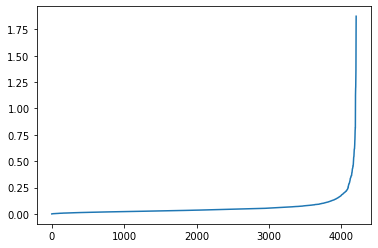

In [37]:
knn = NearestNeighbors(n_neighbors=10)
nbrs = knn.fit(pca_customer_profile)
distances, indices = nbrs.kneighbors(pca_customer_profile)
distances = np.sort(distances, axis=0)[:,1]
plt.plot(distances);

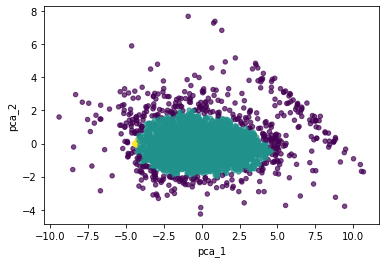

In [40]:
dbscan = DBSCAN(eps=0.25, min_samples=9)
clusters_customers = dbscan.fit_predict(pca_customer_profile)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [39]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

-1     0   1
CustomersNb  485  3714   7

For comparison, if we run the DBSCAN algorithm without the PCA step, the result would be the following:

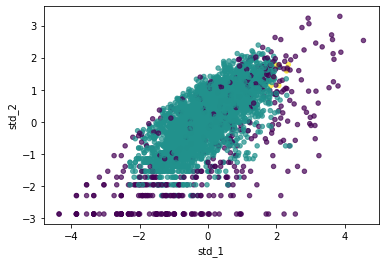

In [41]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [44]:
customer_profile_dbscan = customer_profile.copy(deep=True)
customer_profile_dbscan['cluster'] = clusters_customers
customer_profile_dbscan['cluster'] = customer_profile_dbscan['cluster']
customer_profile_dbscan

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        0  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        0  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499       -1  
18287.0     4.248495  7.516041        0  

[4206 rows x 9 columns]

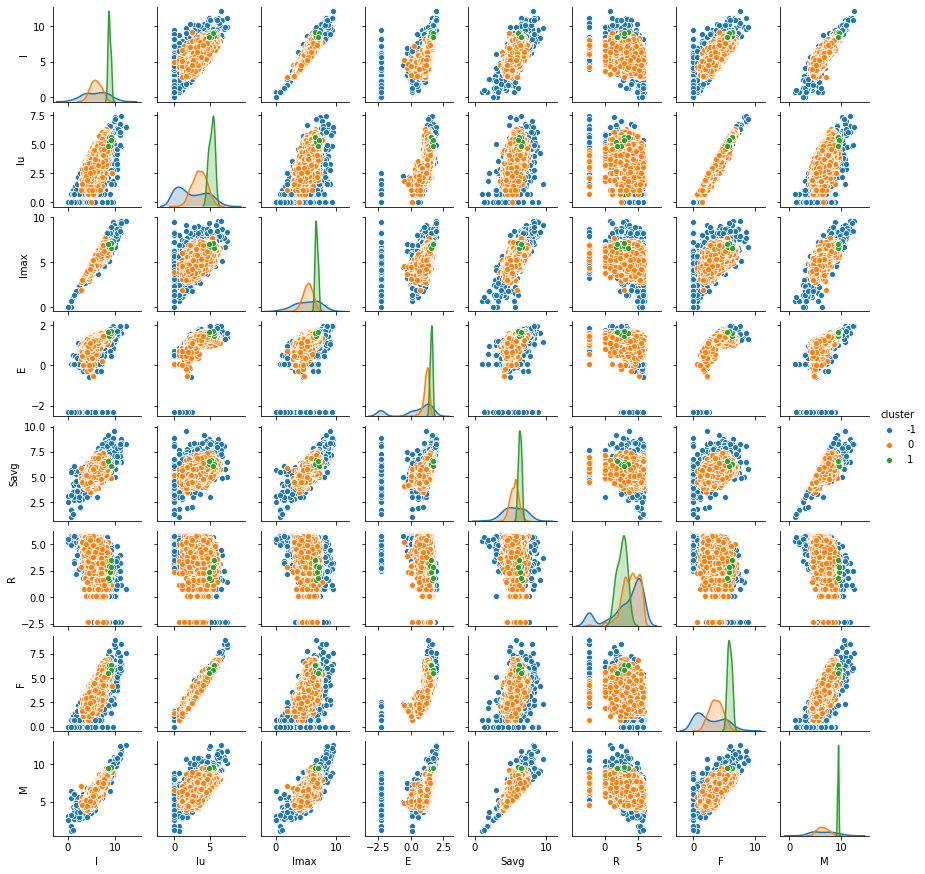

In [45]:
sns.pairplot(customer_profile_dbscan, hue='cluster', diag_kind='kde', height=1.5);

## Agglomerative Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion:

- *Ward* minimizes the euclidean distance of the clusters being merged (is the hierarchical analogue of K-means, so it can be used to initialize it)
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters
- *single* or *maximum linkage* uses the minimum of the distances between all observations of the two sets
    - strength: can handle non-elliptical shapes
    - limitations: sensitive to noise and outliers
- *complete* or *maximum linkage* uses the maximum distances between all observations of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: tends to break large clusters, biased towards globular clusters
- *average* linkage is a compromise between *single* and *complete* linkage by using the average of the distances of each observation of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters

### Ward Linkage

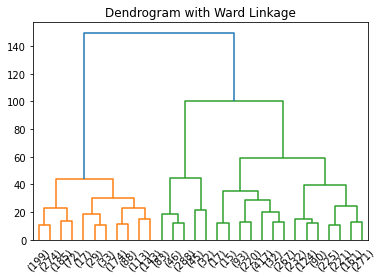

In [122]:
plt.title('Dendrogram with Ward Linkage')
ward_dendo = shc.dendrogram(shc.linkage(pca_customer_profile, method ='ward'), truncate_mode='lastp')

In [79]:
ward = AgglomerativeClustering(linkage='ward')
clusters_customers = ward.fit_predict(pca_customer_profile)

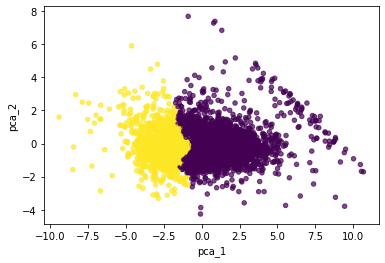

In [80]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [81]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0     1
CustomersNb  2879  1327

For comparison, if we run the agglomerative clustering algorithm with the Ward linkage without the PCA step, the result would be the following:

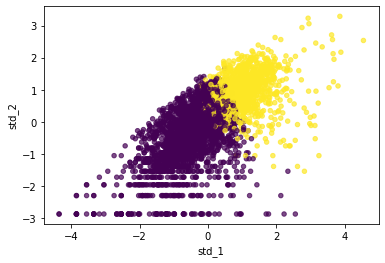

In [82]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [83]:
customer_profile_ward = customer_profile.copy(deep=True)
customer_profile_ward['cluster'] = clusters_customers
customer_profile_ward['cluster'] = customer_profile_ward['cluster']
customer_profile_ward

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        1  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        1  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        1  
18287.0     4.248495  7.516041        1  

[4206 rows x 9 columns]

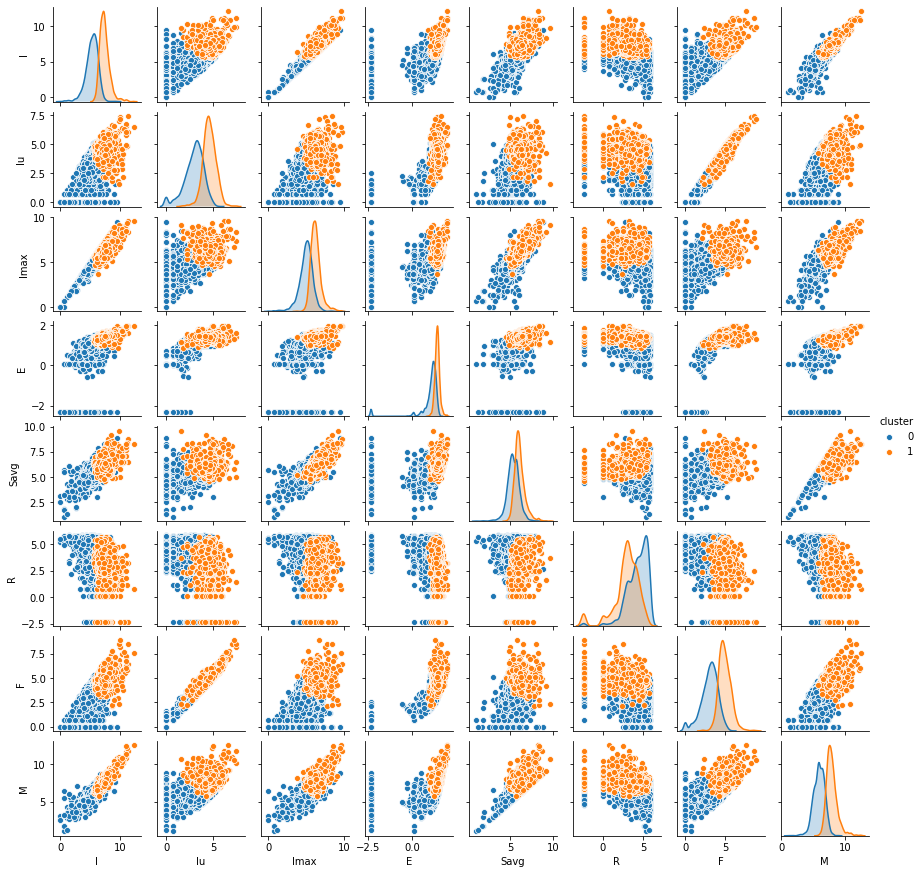

In [84]:
sns.pairplot(customer_profile_ward, hue='cluster', diag_kind='kde', height=1.5);

### Single Linkage

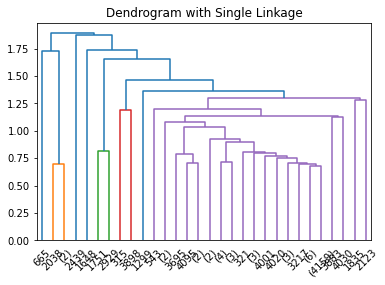

In [123]:
plt.title('Dendrogram with Single Linkage') 
min_dendo = shc.dendrogram(shc.linkage(pca_customer_profile, method ='single'), truncate_mode='lastp')

In [86]:
single = AgglomerativeClustering(linkage='single')
clusters_customers = single.fit_predict(pca_customer_profile)

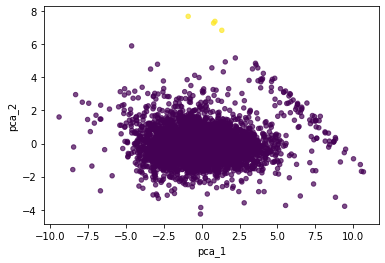

In [87]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [88]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0  1
CustomersNb  4202  4

For comparison, if we run the agglomerative clustering algorithm with the single linkage without the PCA step, the result would be the following:

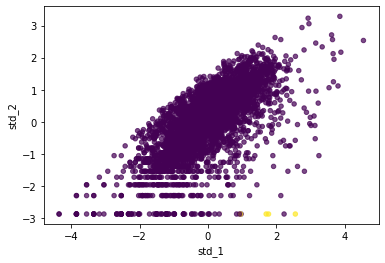

In [89]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [90]:
customer_profile_single = customer_profile.copy(deep=True)
customer_profile_single['cluster'] = clusters_customers
customer_profile_single['cluster'] = customer_profile_single['cluster']
customer_profile_single

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        0  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        0  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        0  
18287.0     4.248495  7.516041        0  

[4206 rows x 9 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


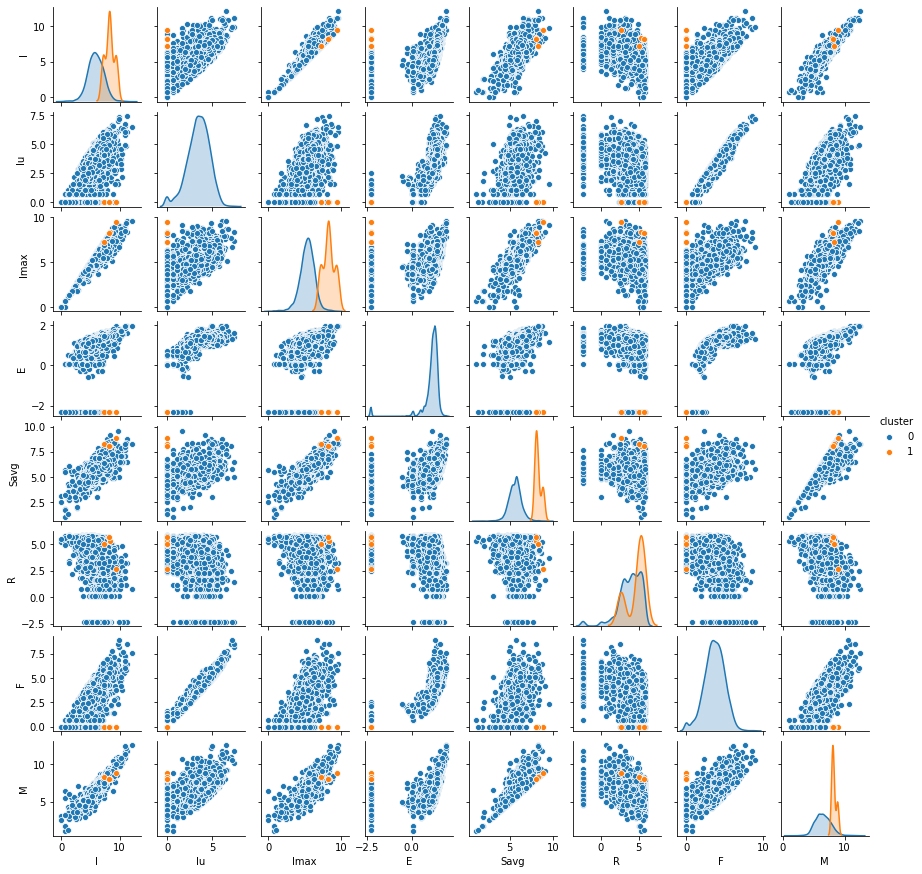

In [91]:
sns.pairplot(customer_profile_single, hue='cluster', diag_kind='kde', height=1.5);

### Complete Linkage

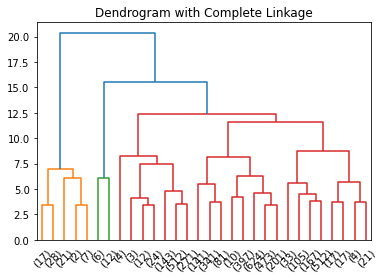

In [124]:
plt.title('Dendrogram with Complete Linkage') 
max_dendo = shc.dendrogram(shc.linkage(pca_customer_profile, method ='complete'), truncate_mode='lastp')

In [93]:
complete = AgglomerativeClustering(linkage='complete')
clusters_customers = complete.fit_predict(pca_customer_profile)

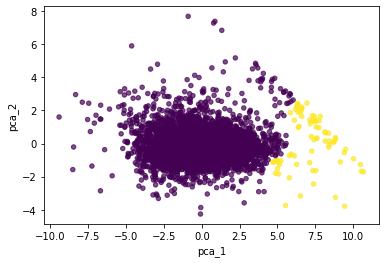

In [94]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [95]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0   1
CustomersNb  4131  75

For comparison, if we run the agglomerative clustering algorithm with the complete linkage without the PCA step, the result would be the following:

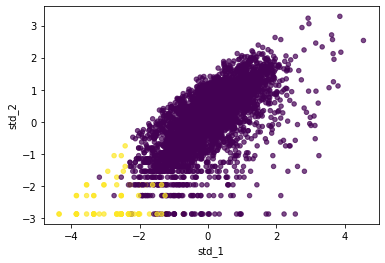

In [96]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [97]:
customer_profile_complete = customer_profile.copy(deep=True)
customer_profile_complete['cluster'] = clusters_customers
customer_profile_complete['cluster'] = customer_profile_complete['cluster']
customer_profile_complete

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        0  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        0  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        0  
18287.0     4.248495  7.516041        0  

[4206 rows x 9 columns]

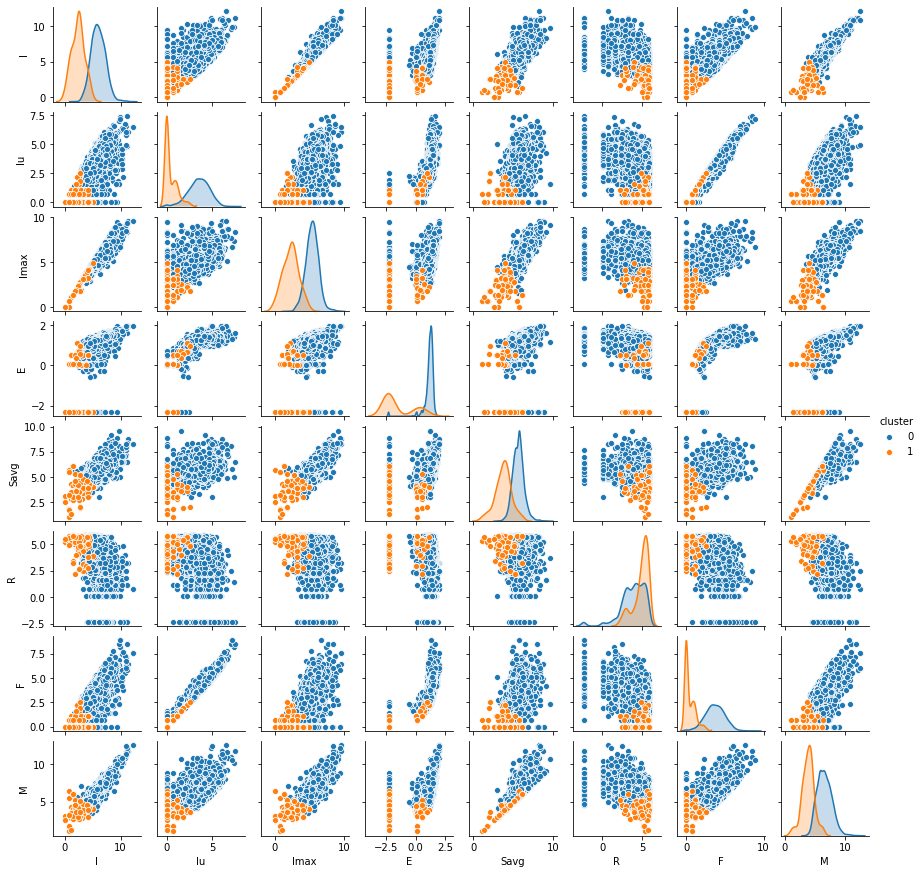

In [98]:
sns.pairplot(customer_profile_complete, hue='cluster', diag_kind='kde', height=1.5);

### Average Linkage

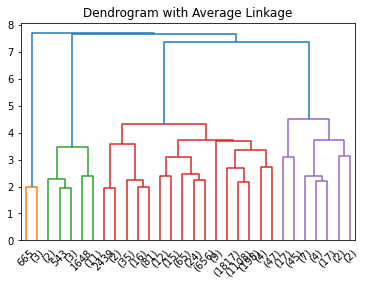

In [125]:
plt.title('Dendrogram with Average Linkage') 
avg_dendo = shc.dendrogram(shc.linkage(pca_customer_profile, method ='average'), truncate_mode='lastp')

In [100]:
avg = AgglomerativeClustering(linkage='average')
clusters_customers = avg.fit_predict(pca_customer_profile)

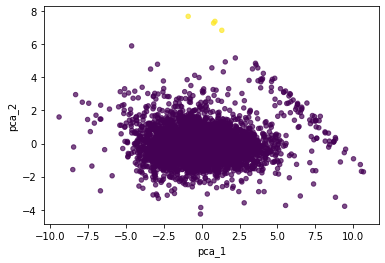

In [101]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [102]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0  1
CustomersNb  4202  4

For comparison, if we run the agglomerative clustering algorithm with the average linkage without the PCA step, the result would be the following:

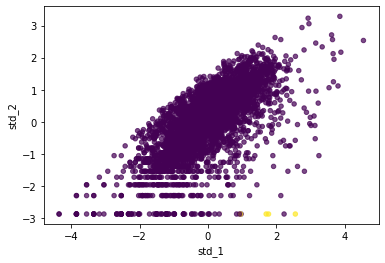

In [103]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [104]:
customer_profile_avg = customer_profile.copy(deep=True)
customer_profile_avg['cluster'] = clusters_customers
customer_profile_avg['cluster'] = customer_profile_avg['cluster']
customer_profile_avg

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        0  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        0  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        0  
18287.0     4.248495  7.516041        0  

[4206 rows x 9 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


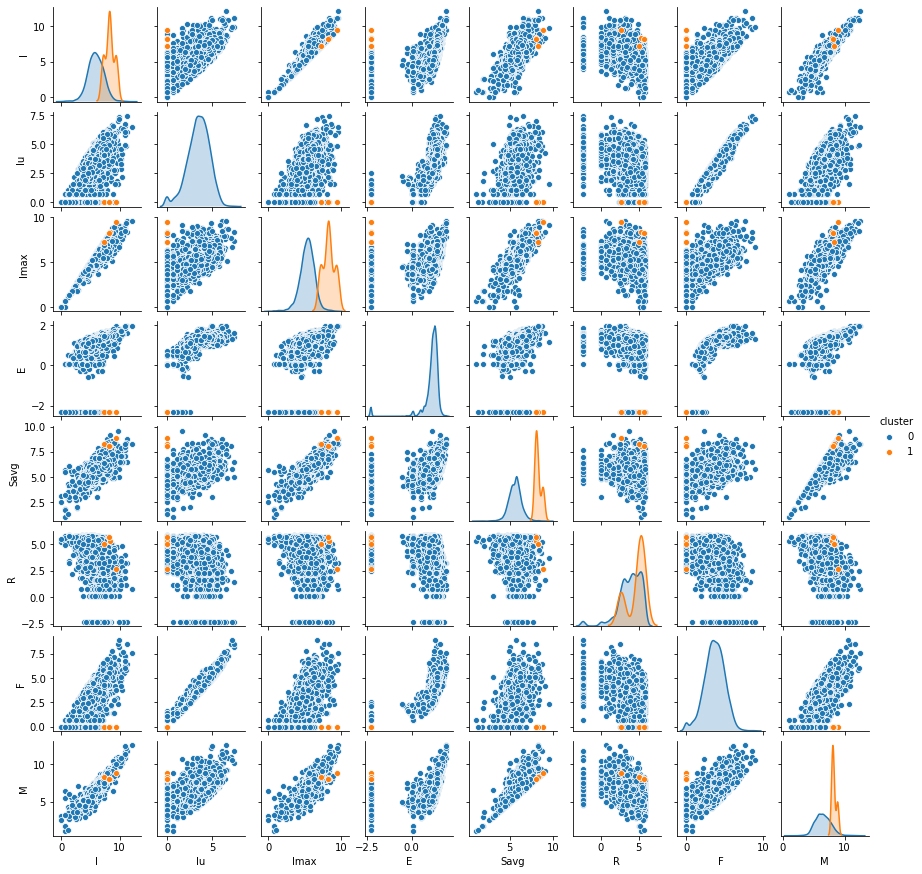

In [105]:
sns.pairplot(customer_profile_avg, hue='cluster', diag_kind='kde', height=1.5);

## Birch

In [106]:
from sklearn.cluster import Birch

In [107]:
birch = Birch()
clusters_customers = birch.fit_predict(pca_customer_profile)

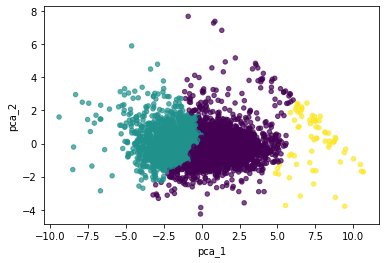

In [108]:
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_customer_profile.T, c=clusters_customers, s=20, alpha=0.7);

In [109]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

0     1   2
CustomersNb  2426  1711  69

For comparison, if we run the agglomerative clustering algorithm with the single linkage without the PCA step, the result would be the following:

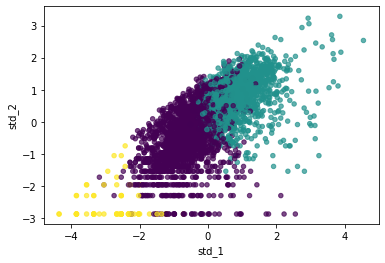

In [110]:
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_customer_profile[:, 0], std_customer_profile[:, 1], c=clusters_customers, s=20, alpha=0.7);

In [111]:
customer_profile_birch = customer_profile.copy(deep=True)
customer_profile_birch['cluster'] = clusters_customers
customer_profile_birch['cluster'] = customer_profile_birch['cluster']
customer_profile_birch

I        Iu      Imax         E      Savg         R  \
CustomerID                                                               
12347.0     7.668094  4.465908  6.516193  1.467671  6.396432  3.691376   
12348.0     6.988413  2.197225  6.396930  0.974688  5.566358  4.332048   
12349.0     6.445720  4.276666  6.445720  1.387111  7.284512  2.949688   
12350.0     5.278115  2.772589  5.278115  0.955511  5.684939  5.740114   
12352.0     6.137727  4.043051  4.828314  1.181226  5.351392  4.291828   
...              ...       ...       ...       ...       ...       ...   
18280.0     3.806662  2.302585  3.806662  0.666002  5.196285  5.075799   
18281.0     3.988984  1.945910  3.988984  0.663909  4.392224  1.410987   
18282.0     4.584967  2.484907  4.248495  1.138492  4.480740  5.375741   
18283.0     7.211557  5.568345  5.484797  1.003273  4.847910  2.312535   
18287.0     7.368970  4.077537  6.897705  1.458201  6.417429 -2.302585   

                   F         M  cluster  
CustomerID                               
12347.0     5.017280  8.188192        1  
12348.0     2.397895  6.664970        0  
12349.0     4.276666  7.284512        1  
12350.0     2.772589  5.684939        0  
12352.0     4.248495  7.143151        0  
...              ...       ...      ...  
18280.0     2.302585  5.196285        0  
18281.0     1.945910  4.392224        0  
18282.0     2.484907  5.173887        0  
18283.0     6.577861  7.620499        0  
18287.0     4.248495  7.516041        1  

[4206 rows x 9 columns]

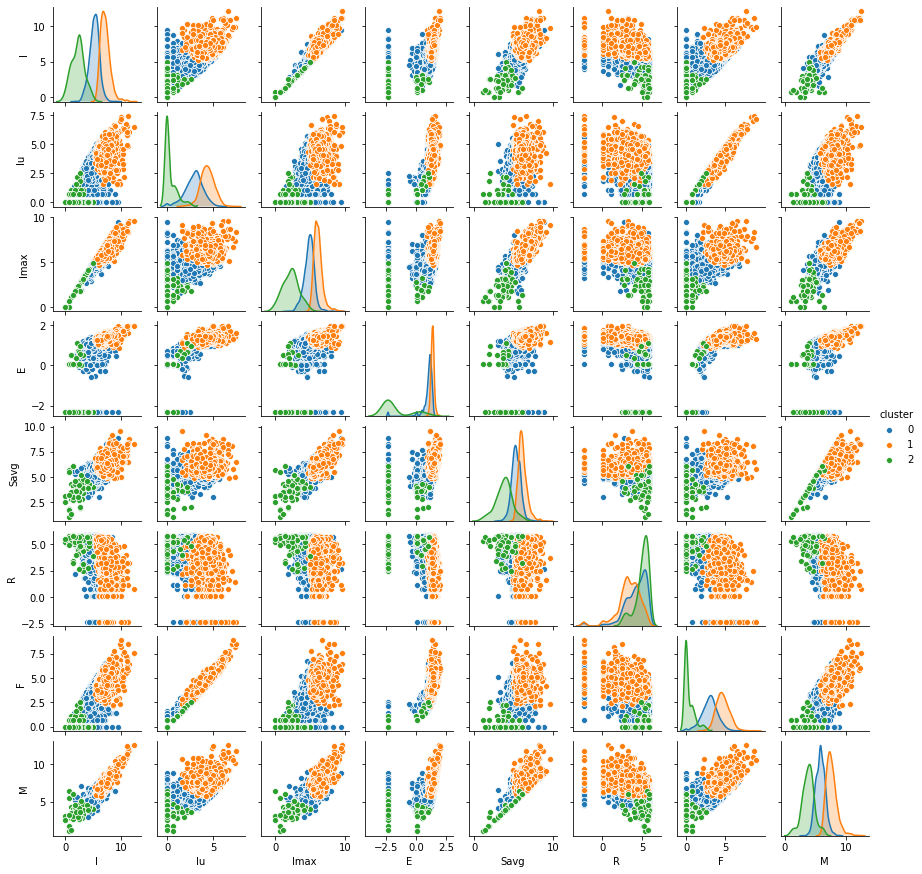

In [112]:
sns.pairplot(customer_profile_birch, hue='cluster', diag_kind='kde', height=1.5);